Return the time-variant stellar spectra as a function of starspot coverage parameters 

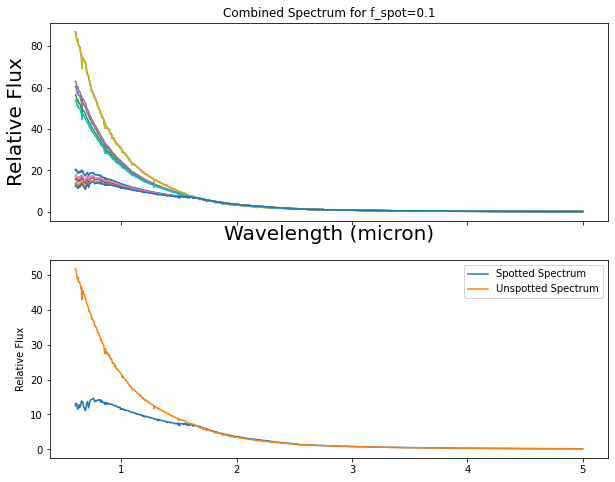

In [16]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from rainbowconnection.sources.phoenix import *

def time_variant_spectra(wavelength,
                          T_spot = 4000 *u.K,
                          T_unspot = 5778 *u.K,
                          f_spot = 0.1,
                          f_tra = 0.,
                          r_sun = 0.5 * u.Rsun,
                          m_sun = 0.5 * u.Msun,
                          transit_depth = 0.06,
                          plot=True):
    """
    Calculate delta D(lambda), the contribution of 
    starspot features to the wavelength dependent transit depth

    Parameters
    ----------
    T1
        the photosphere temperature, in K
    T2
        the spot temperature, in K
    f_spot
        the global spot coverage fraction
    f_tra
        the transit chord spot coverage fraction
    r_sun
        the stellar radius, in solar radii
    m_sun
        the stellar mass, in solar masses
    """
    
    Prot = 4.865 #days
    time = np.linspace(0,10,11)
    A = 1./np.sqrt(2)
    B = A
    
    df = A*np.sin(2.*np.pi*time/Prot) + B*np.cos(2.*np.pi*time/Prot)
    # how do I get around needing a rotation period input?
    
    f_t = f_spot + df
        
    S_spot = Star(teff=T_spot, radius=r_sun,mass=m_sun,R=1e5,extend_wavelengths=True)
    S_unspot = Star(teff=T_unspot, radius=r_sun,mass=m_sun,R=1e5,extend_wavelengths=True)
    
    s_spot = S_spot.spectrum(wavelength)/np.nanmedian(S_spot.spectrum(wavelength))
    s_unspot = S_unspot.spectrum(wavelength)/np.nanmedian(S_unspot.spectrum(wavelength))
    
    # this is f(t), the coverage fraction and a specific point in time
    integrated_flux = [None]*len(time)
    for i in range(len(time)):
        integrated_flux[i] = f_t[i]*s_spot + (1.-f_t[i])*s_unspot
    
    
    if plot:
        fig,[ax0,ax1] = plt.subplots(2,1, figsize=(10,8),sharex=True)
        
        for i in range(len(time)):
            ax0.plot(wavelength,integrated_flux[i])
        ax0.set_ylabel('Relative Flux',fontsize=20)
        ax0.set_xlabel(f'Wavelength ({wavelength.unit})',fontsize=20)
        ax0.set_title(f'Combined Spectrum for f_spot={f_spot}')

        ax1.plot(wavelength.value,s_spot,label='Spotted Spectrum')
        ax1.plot(wavelength.value,s_unspot,label='Unspotted Spectrum')
        ax1.set_ylabel('Relative Flux')
        ax1.legend()
        
        plt.savefig('time_domain_spectrum.pdf')
    
result = time_variant_spectra(wavelength=np.linspace(0.6,5,1000)*u.micron)